In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rku68\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
loan=pd.read_csv(r"C:\Users\rku68\OneDrive\Desktop\csv\loan.csv")

In [3]:
loan.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
loan.shape

(614, 13)

In [5]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\rku68\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


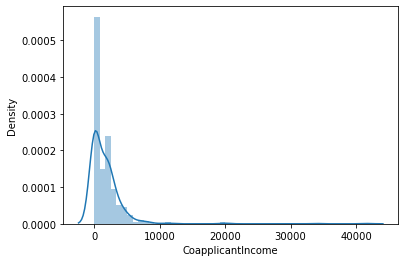

In [6]:
sns.distplot(loan["CoapplicantIncome"])
plt.show()

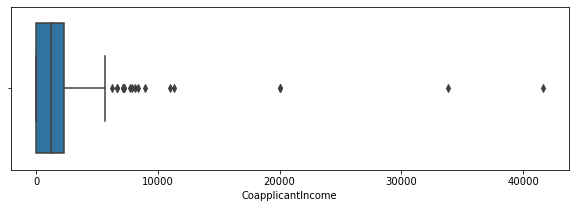

In [7]:
plt.figure(figsize=(10,3))
sns.boxplot(x='CoapplicantIncome',data=loan)
plt.show()

In [8]:
q1=loan['CoapplicantIncome'].quantile(0.25)

In [9]:
q3=loan['CoapplicantIncome'].quantile(0.75)

In [10]:
IQR=q3-q1

In [11]:
min_value=q1-(1.5*IQR)
max_value=q3+(1.5*IQR)


In [12]:
loan=loan[loan['CoapplicantIncome']<=max_value]

C:\Users\rku68\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


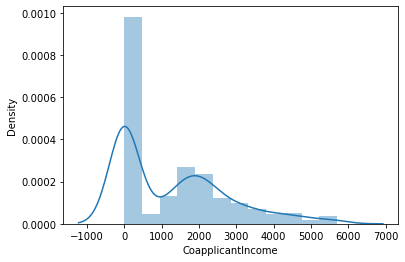

In [13]:
sns.distplot(loan['CoapplicantIncome'])
plt.show()

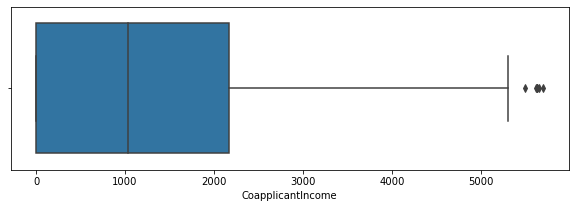

In [14]:
plt.figure(figsize=(10,3))
sns.boxplot(x='CoapplicantIncome',data=loan)
plt.show()

In [15]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

In [16]:
ft=FunctionTransformer(func=np.log1p)

In [17]:
ft.fit(loan[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [18]:
loan['CoapplicantIncome_ft']=ft.transform(loan[['CoapplicantIncome']])

In [19]:


loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_ft
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.765993
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.000000
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.484797
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.000000


C:\Users\rku68\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rku68\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


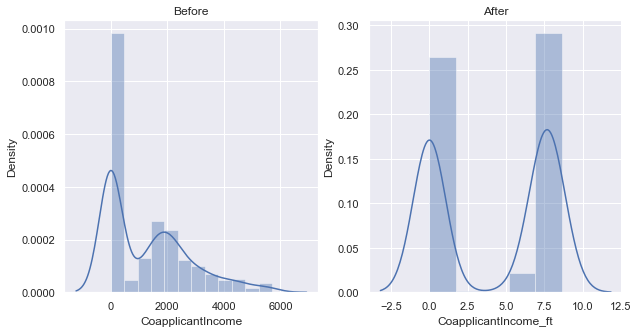

In [21]:
sns.set(rc={'figure.figsize':(10,5)})
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(loan['CoapplicantIncome'])
plt.subplot(1,2,2)
plt.title('After')
sns.distplot(loan['CoapplicantIncome_ft'])
plt.show()

C:\Users\rku68\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


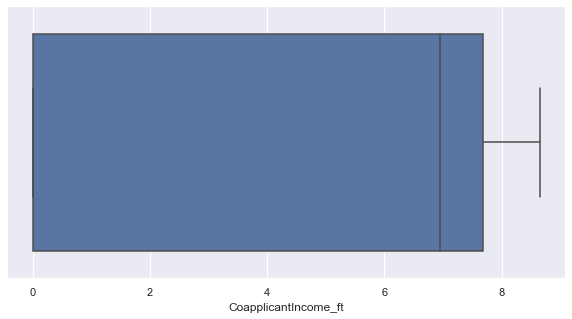

In [22]:
sns.boxplot(loan['CoapplicantIncome_ft'])
plt.show()

In [ ]:
ft1=FunctionTransformer(func= lambda x:x**2)


In [ ]:
ft1.fit(loan[['CoapplicantIncome']])

In [ ]:
loan['CoapplicantIncome_ft1']=ft1.transform(loan[['CoapplicantIncome']])

In [ ]:
loan

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(loan['CoapplicantIncome'])
plt.subplot(1,2,2)
plt.title('After')
sns.distplot(loan['CoapplicantIncome_ft1'])
plt.show()

In [ ]:
sns.boxplot(loan['CoapplicantIncome_ft1'])
plt.show()